# EQI Schematic

This file is used to get the EEG trace and normal distribution used to make the image similar to the EQI paper schematic

In [1]:
# Import libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from Functions.temple_data import TempleData


# EEG trace

Extracting EDF parameters from c:\Users\danie\Documents\Projects\art-eqi-p300-validation\Data\Temple\edf\01_tcp_ar\069\00006906\s001_2010_09_09\00006906_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


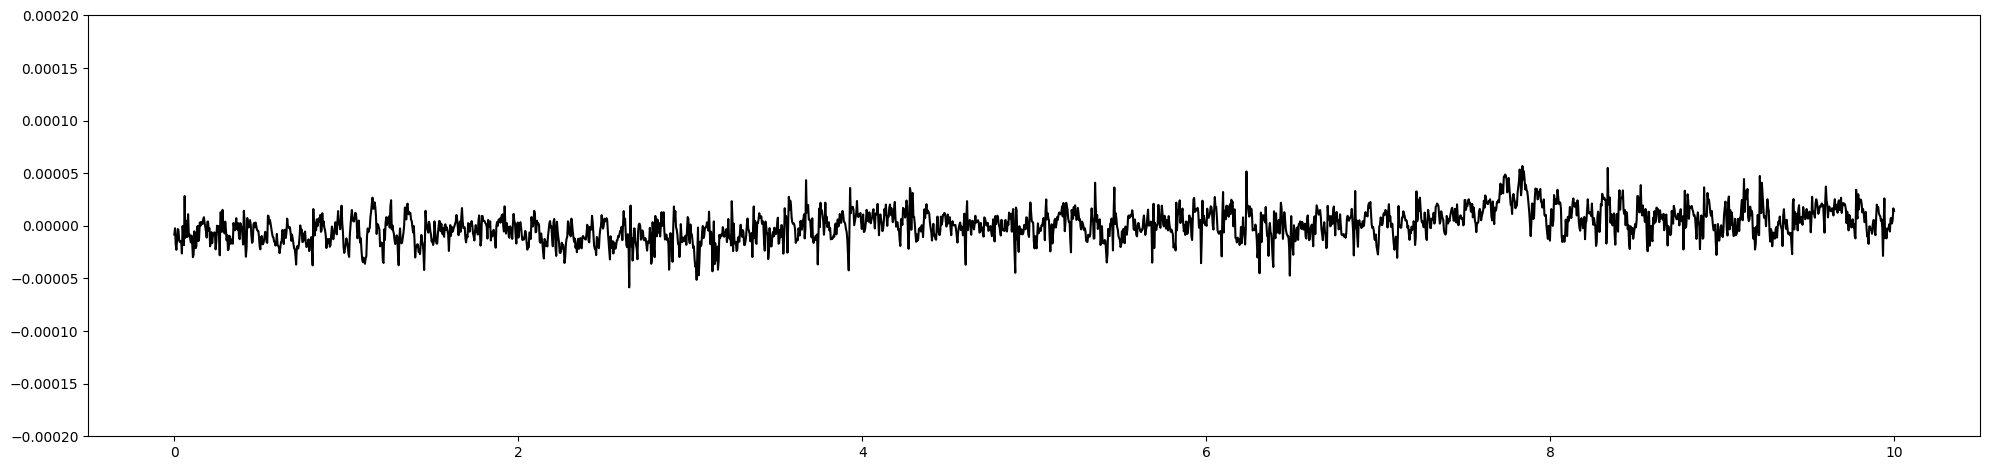

In [31]:
# Files info
file = r"Data\Temple\edf\01_tcp_ar\069\00006906\s001_2010_09_09\00006906_s001_t001.edf"
artifact_file = r"Data\Temple\csv\labels_01_tcp_ar.csv"

# Get clean data
temple = TempleData(file)
temple.get_artifacts_from_csv(artifact_file)
clean = temple.get_clean_data(clean_window_length = 10)

# Plot clean data
t = np.linspace(0, clean.shape[-1]/temple.srate, clean.shape[-1])
[fig, ax] = plt.subplots()

ax.plot(t,clean[10,5,:],"k")
ax.set_ylim(-2e-4, 2e-4)
fig.set_figwidth(20)

plt.savefig(r"Figures\rawEEG.svg", format="svg")
plt.tight_layout()

# Normal distribution

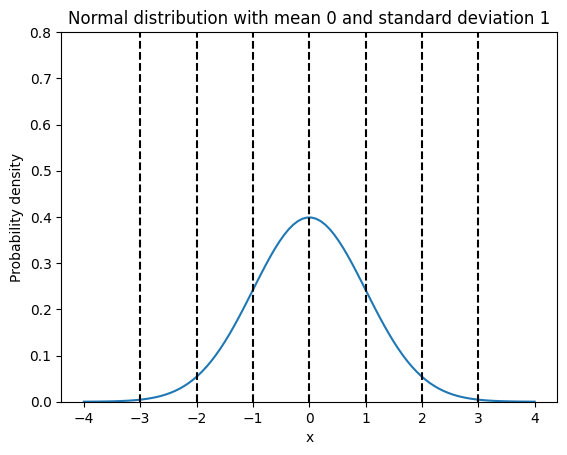

In [32]:
# set the mean and standard deviation
mu = 0
sigma = 1

# create a range of x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# plot the normal distribution curve
plt.plot(x, norm.pdf(x, mu, sigma))
plt.ylim([0, 0.8])

# plot the vertical dotted lines at +/- 1, 2, and 3 sigma
plt.axvline(mu, color='k', linestyle='--')
plt.axvline(mu + sigma, color='k', linestyle='--')
plt.axvline(mu - sigma, color='k', linestyle='--')
plt.axvline(mu + 2*sigma, color='k', linestyle='--')
plt.axvline(mu - 2*sigma, color='k', linestyle='--')
plt.axvline(mu + 3*sigma, color='k', linestyle='--')
plt.axvline(mu - 3*sigma, color='k', linestyle='--')

# add some labels and title
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Normal distribution with mean 0 and standard deviation 1')

# save the figure as an svg file
plt.savefig(r'Figures\normal_distribution.svg', format='svg')

# show the plot
plt.show()
